**Business Case: Walmart - Confidence Interval and CLT**

**About Walmart**

Walmart is a multinational retail giant headquartered in the United States, operating a vast network of supercenters, discount stores, and grocery outlets worldwide. With a customer base exceeding 100 million, Walmart is a dominant force in the retail industry.

**Business Challenge**

Walmart Inc.'s management seeks to delve into customer purchasing patterns, particularly regarding gender, to inform strategic decisions. They aim to discern potential differences in spending behaviors between male and female customers, focusing on Black Friday sales. Given a customer base split evenly between 50 million males and 50 million females, Walmart wants to ascertain whether women tend to spend more than men.

**Dataset Overview**

The dataset comprises transactional records from Walmart's Black Friday sales, encompassing various customer attributes:

|Variable    |Description       |
|:--------------|:-------------------|
|User_ID:| 	Unique user identifier|
|Product_ID:| 	Product identifier|
|Gender:| 	Sex of the user|
|Age:| 	Age category|
|Occupation:| 	Occupation code|
|City_Category:| 	City category (A, B, or C)|
|StayInCurrentCityYears:| 	Number of years residing in the current city|
|Marital_Status:| 	Marital status|
|ProductCategory:| 	Product category code|
|Purchase:| 	Purchase amount|

This dataset will be analyzed to gain insights into customer purchasing behavior, particularly focusing on gender-specific spending habits during Black Friday sales.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/walmart_data.csv')
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,7871


In [ ]:
print(f"Number of rows: {df.shape[0]:,} \nNumber of columns: {df.shape[1]}")

Number of rows: 550,068 
Number of columns: 10


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


Change the data types of - **`Occupation`**, **`Marital_Status`**, **`Product_Category`**

In [ ]:
cols = ['Occupation', 'Marital_Status', 'Product_Category']
df[cols] = df[cols].astype('object')

In [ ]:
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                    object
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                object
Product_Category              object
Purchase                       int64
dtype: object

In [ ]:
df.memory_usage()

Index                             128
User_ID                       4400544
Product_ID                    4400544
Gender                        4400544
Age                           4400544
Occupation                    4400544
City_Category                 4400544
Stay_In_Current_City_Years    4400544
Marital_Status                4400544
Product_Category              4400544
Purchase                      4400544
dtype: int64

In [ ]:
df.describe()

,User_ID,Purchase
count,5.500680e+05,550068.000000
mean,1.003029e+06,9263.968713
std,1.727592e+03,5023.065394
min,1.000001e+06,12.000000
25%,1.001516e+06,5823.000000
50%,1.003077e+06,8047.000000
75%,1.004478e+06,12054.000000
max,1.006040e+06,23961.000000


**Observations**

- The dataset does not contain any missing values.
- It is possible that there are outliers present in the purchase amount variable.


In [ ]:
# checking null values
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [ ]:
df['User_ID'].nunique()

5891

In [ ]:
df['Product_ID'].nunique()

3631

In [ ]:
categorical_cols = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']
df[categorical_cols].melt().groupby(['variable', 'value'])[['value']].count()/len(df)

value
variable                   value          
Age                        0-17   0.027455
                           18-25  0.181178
                           26-35  0.399200
                           36-45  0.199999
                           46-50  0.083082
                           51-55  0.069993
                           55+    0.039093
City_Category              A      0.268549
                           B      0.420263
                           C      0.311189
Gender                     F      0.246895
                           M      0.753105
Marital_Status             0      0.590347
                           1      0.409653
Occupation                 0      0.126599
                           1      0.086218
                           2      0.048336
                           3      0.032087
                           4      0.131453
                           5      0.022137
                           6      0.037005
                           7      0.107501
                           8      0.002811
                           9      0.011437
                           10     0.023506
                           11     0.021063
                           12     0.056682
                           13     0.014049
                           14     0.049647
                           15     0.022115
                           16     0.046123
                           17     0.072796
                           18     0.012039
                           19     0.015382
                           20     0.061014
Product_Category           1      0.255201
                           2      0.043384
                           3      0.036746
                           4      0.021366
                           5      0.274390
                           6      0.037206
                           7      0.006765
                           8      0.207111
                           9      0.000745
                           10     0.009317
                           11     0.044153
                           12     0.007175
                           13     0.010088
                           14     0.002769
                           15     0.011435
                           16     0.017867
                           17     0.001051
                           18     0.005681
                           19     0.002914
                           20     0.004636
Stay_In_Current_City_Years 0      0.135252
                           1      0.352358
                           2      0.185137
                           3      0.173224
                           4+     0.154028

**Observations**

- Approximately 80% of the users fall within the age range of 18-50, with 40% aged between 26-35, 18% between 18-25, and 20% between 36-45.
- 75% of the users identify as male, while 25% are female.
- Among the users, 60% are single, and 40% are married.
- Regarding city residency, 35% of users have been residing in the city for 1 year, 18% for 2 years, and 17% for 3 years.
- The dataset contains a total of 20 product categories.
- There are 20 distinct occupation types represented in the dataset.

**Univariate Analysis**

**Understanding the distribution of data and detecting outlies for continuous variables**

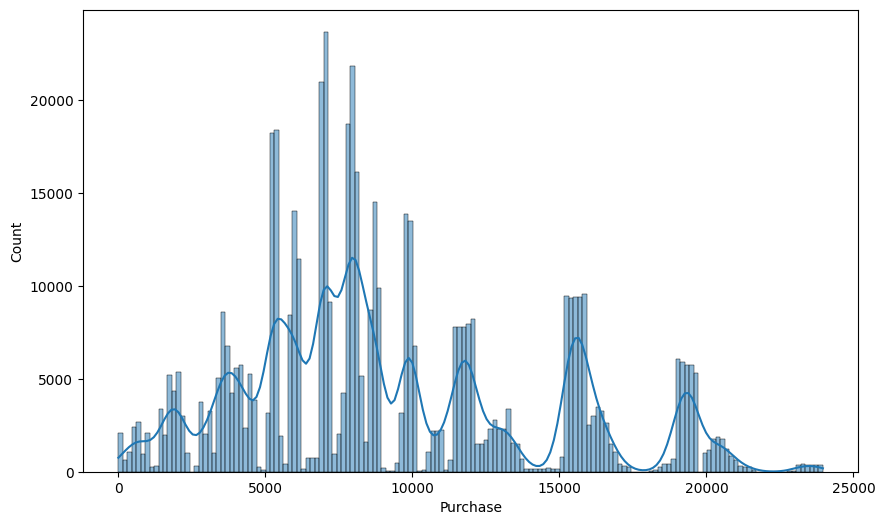

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Purchase', kde=True)
plt.show()

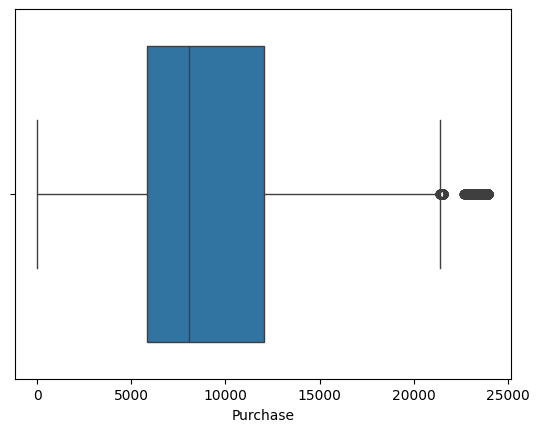

In [ ]:
sns.boxplot(data=df, x='Purchase', orient='h')
plt.show()

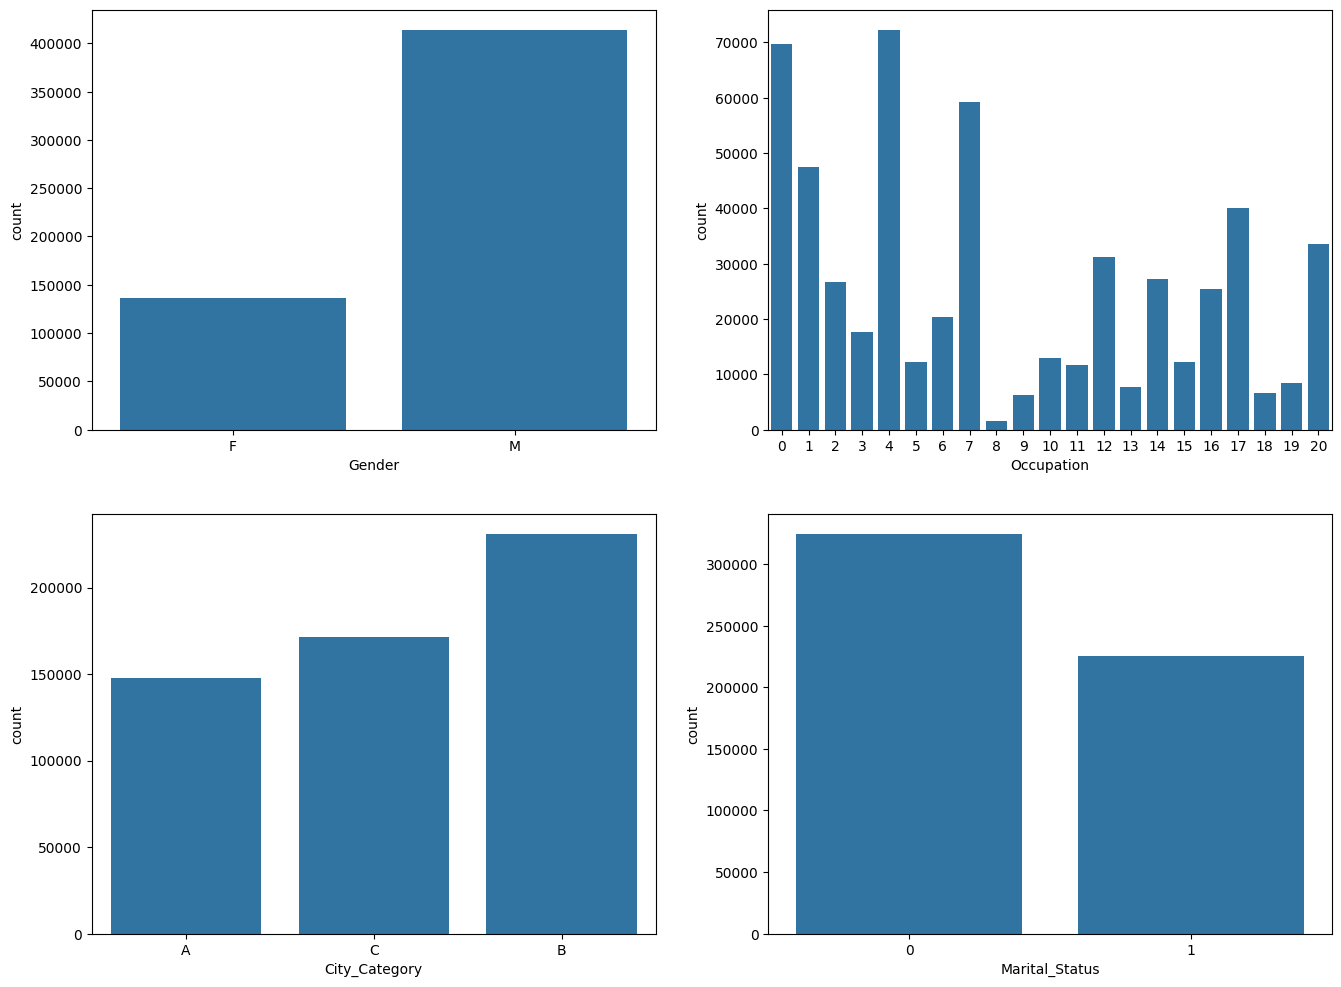

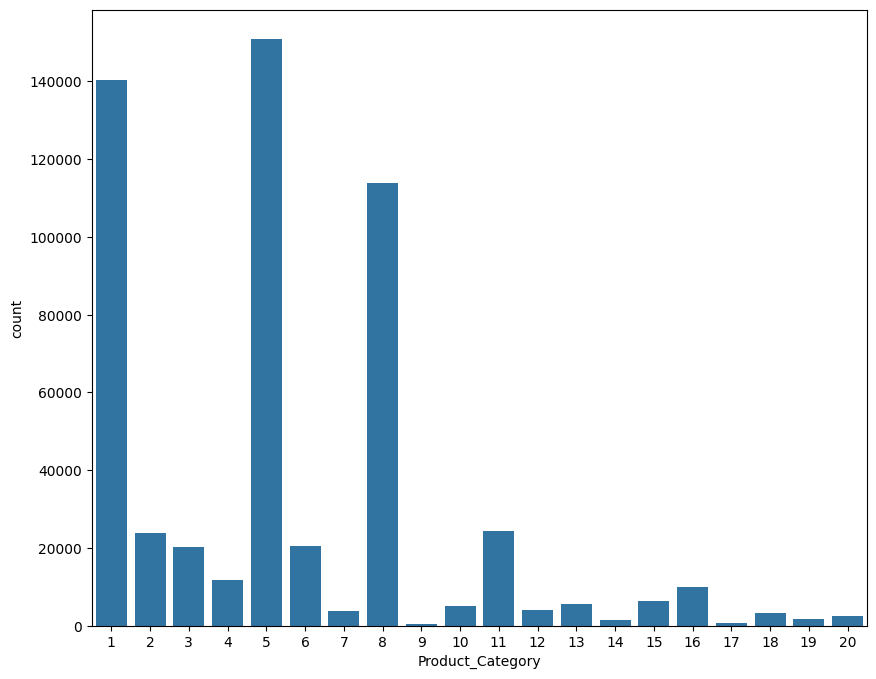

In [ ]:
categorical_cols = ['Gender', 'Occupation','City_Category','Marital_Status','Product_Category']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
sns.countplot(data=df, x='Gender', ax=axs[0,0])
sns.countplot(data=df, x='Occupation', ax=axs[0,1])
sns.countplot(data=df, x='City_Category', ax=axs[1,0])
sns.countplot(data=df, x='Marital_Status', ax=axs[1,1])
plt.show()

plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='Product_Category')
plt.show()

**Observations**
- The majority of users identify as male.
- There are 20 distinct types of occupation and product categories.
- The highest number of users reside in City_Category 'B'.
- There are more single users compared to married users.
- Product categories 1, 5, 8, and 11 exhibit the highest purchasing frequency.

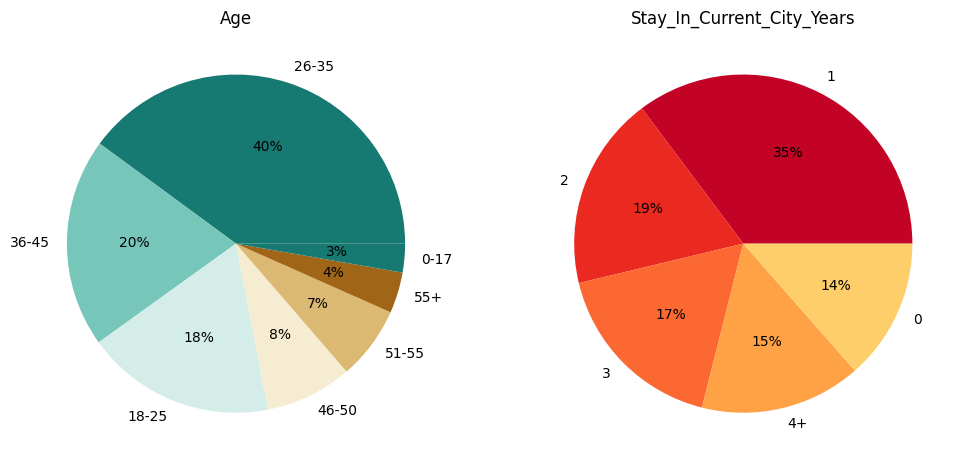

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

data = df['Age'].value_counts(normalize=True)*100
palette_color = sns.color_palette('BrBG_r')
axs[0].pie(x=data.values, labels=data.index, autopct='%.0f%%', colors=palette_color)
axs[0].set_title("Age")

data = df['Stay_In_Current_City_Years'].value_counts(normalize=True)*100
palette_color = sns.color_palette('YlOrRd_r')
axs[1].pie(x=data.values, labels=data.index, autopct='%.0f%%', colors=palette_color)
axs[1].set_title("Stay_In_Current_City_Years")


plt.show()

**Observations**
- Approximately 80% of users fall within the age range of 18-50, with 40% aged between 26-35, 18% between 18-25, and 20% between 36-45.
- Regarding the duration of stay in the city, 35% have been residents for 1 year, 18% for 2 years, 17% for 3 years, 15% for 4 years or more, and 14% are new to the city.

**Bi-variate Analysis**

<ipython-input-17-88a4bed87712>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y='Purchase', x=attrs[count], ax=axs[row, col], palette='Set3')
<ipython-input-17-88a4bed87712>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y='Purchase', x=attrs[count], ax=axs[row, col], palette='Set3')
<ipython-input-17-88a4bed87712>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y='Purchase', x=attrs[count], ax=axs[row, col], palette='Set3')
<ipython-input-17-88a4bed87712>:9: FutureWarning: 

Passing `palette` without assigni

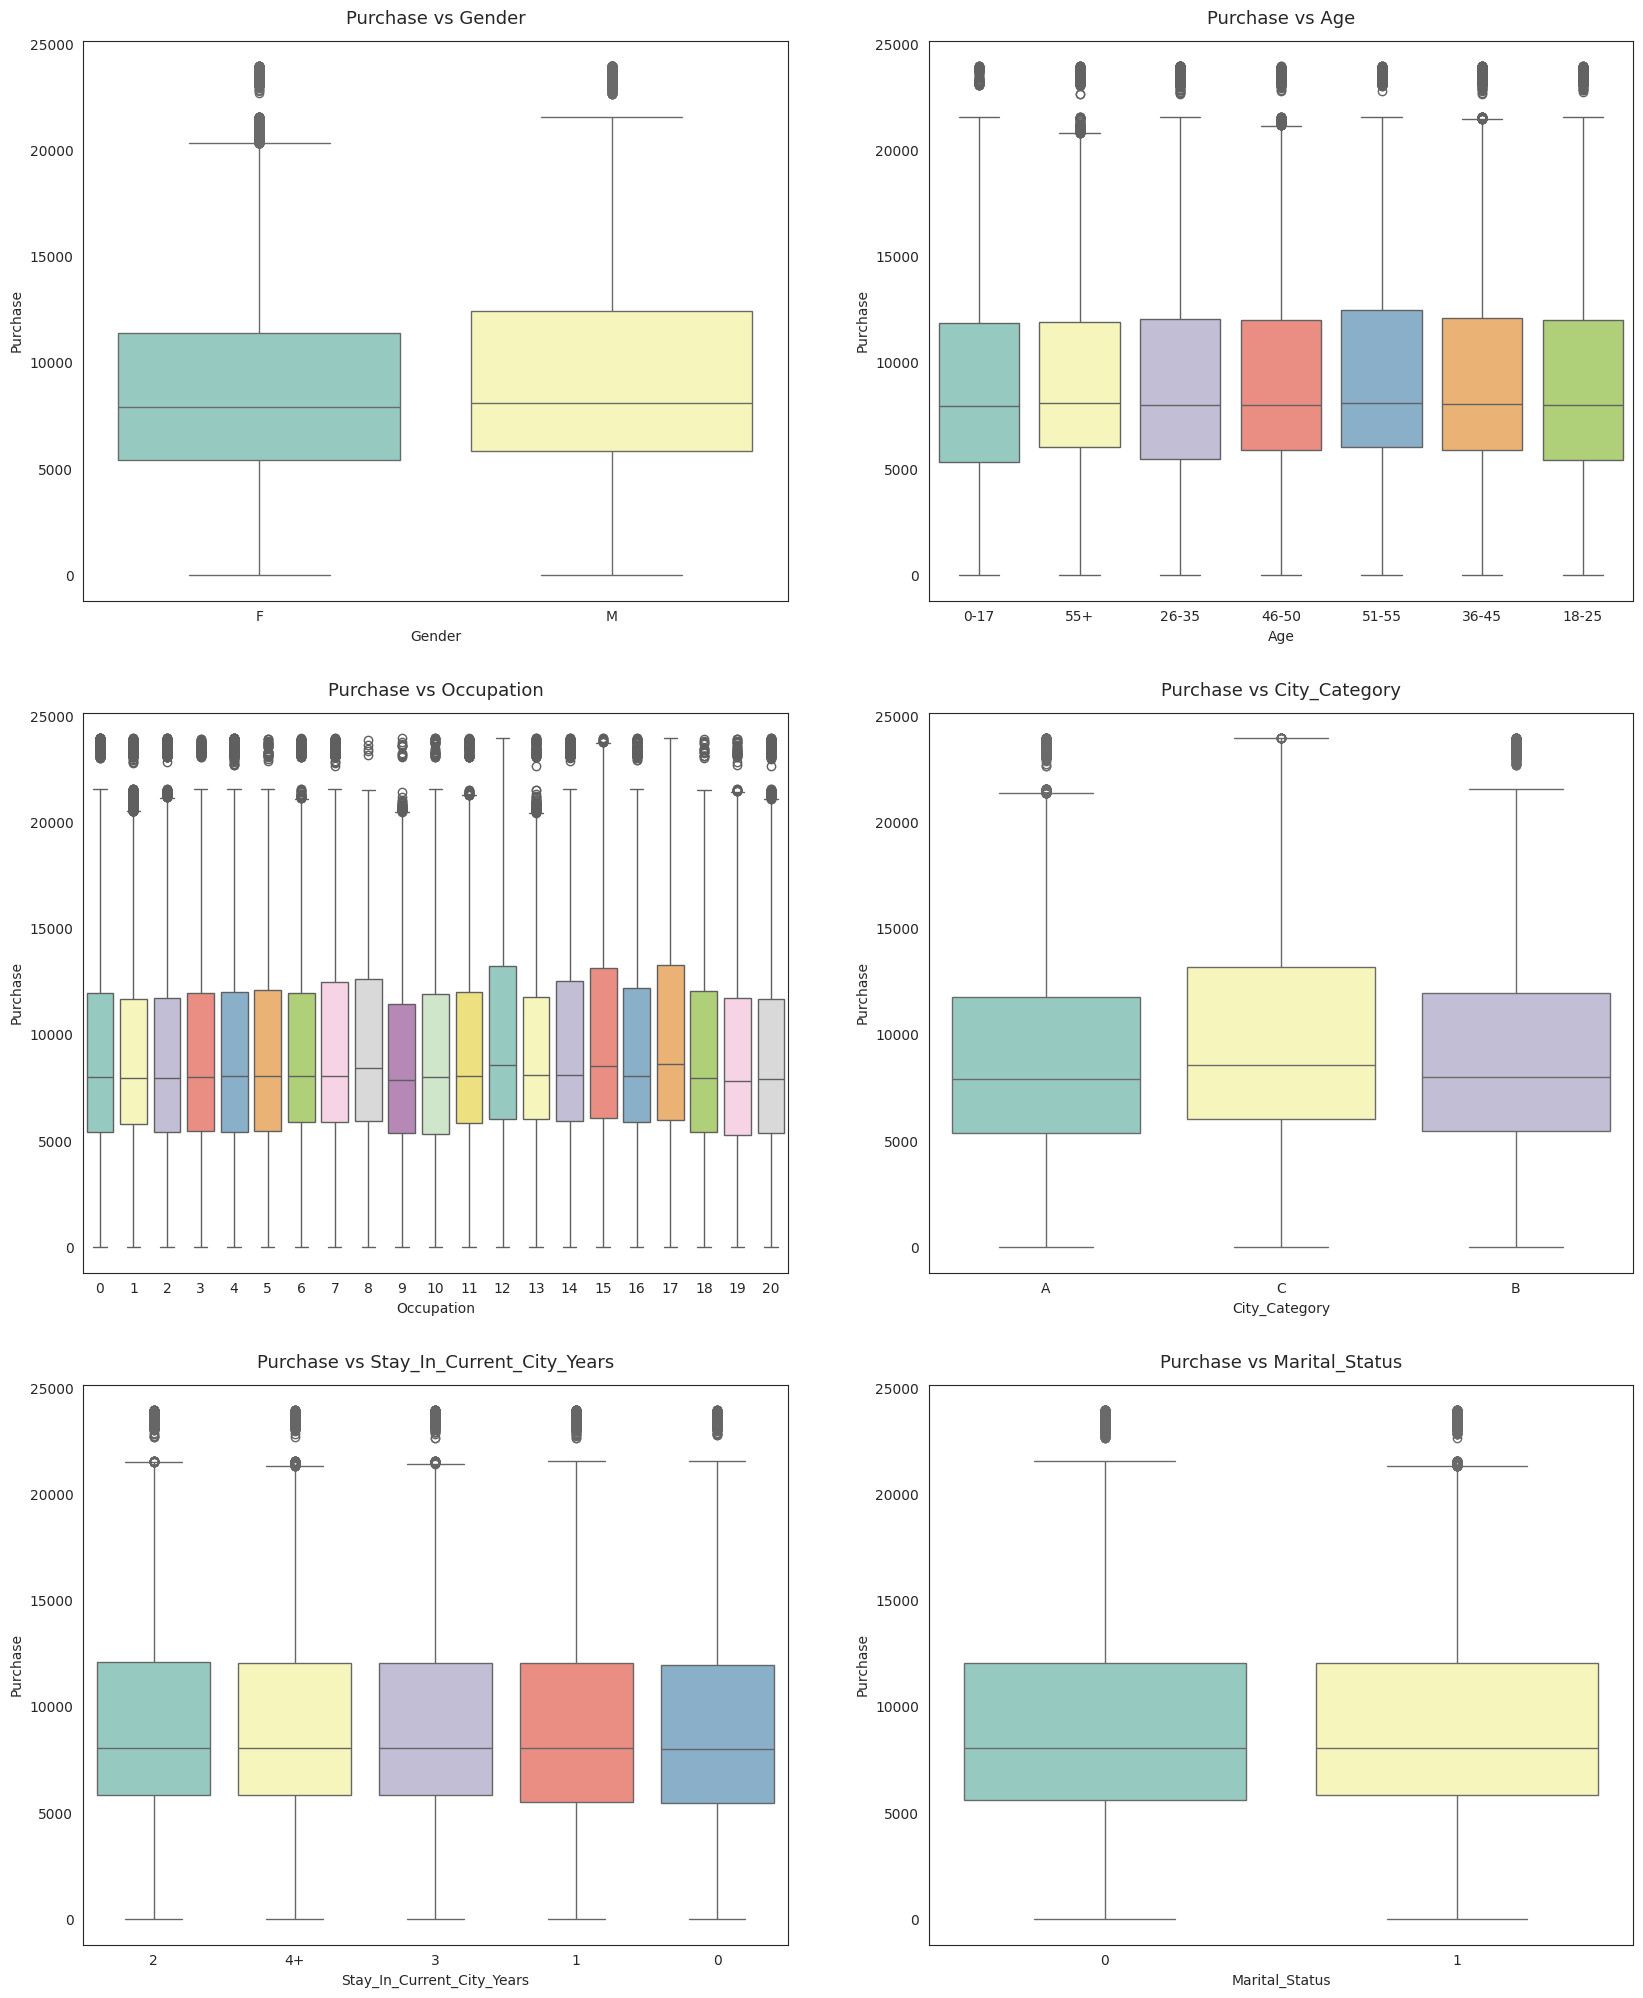

In [ ]:
attrs = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']
sns.set_style("white")

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20, 16))
fig.subplots_adjust(top=1.3)
count = 0
for row in range(3):
    for col in range(2):
        sns.boxplot(data=df, y='Purchase', x=attrs[count], ax=axs[row, col], palette='Set3')
        axs[row,col].set_title(f"Purchase vs {attrs[count]}", pad=12, fontsize=13)
        count += 1
plt.show()


<ipython-input-18-962dca1427f4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y='Purchase', x=attrs[-1], palette='Set3')


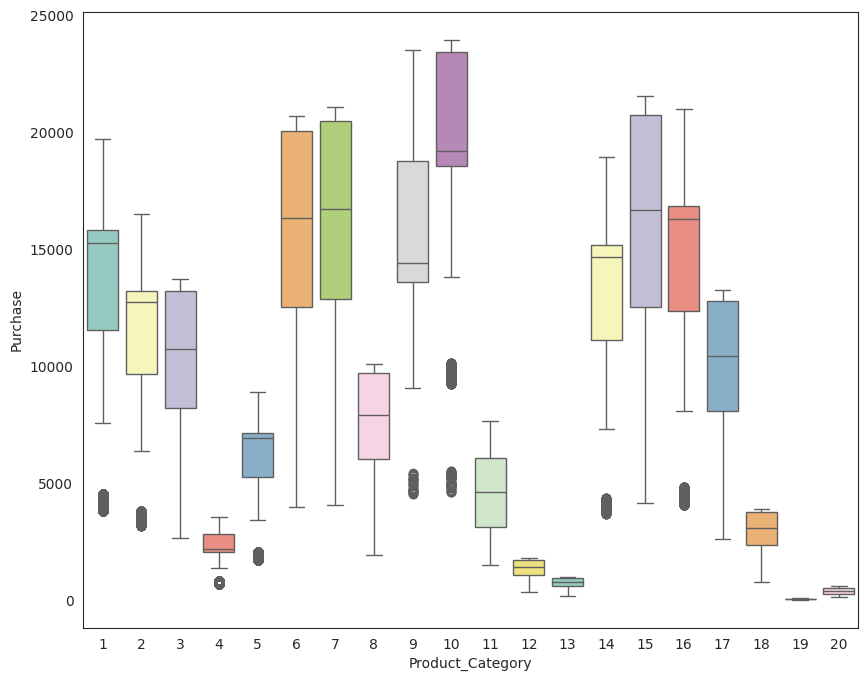

In [ ]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df, y='Purchase', x=attrs[-1], palette='Set3')
plt.show()

**Multivariate Analysis**

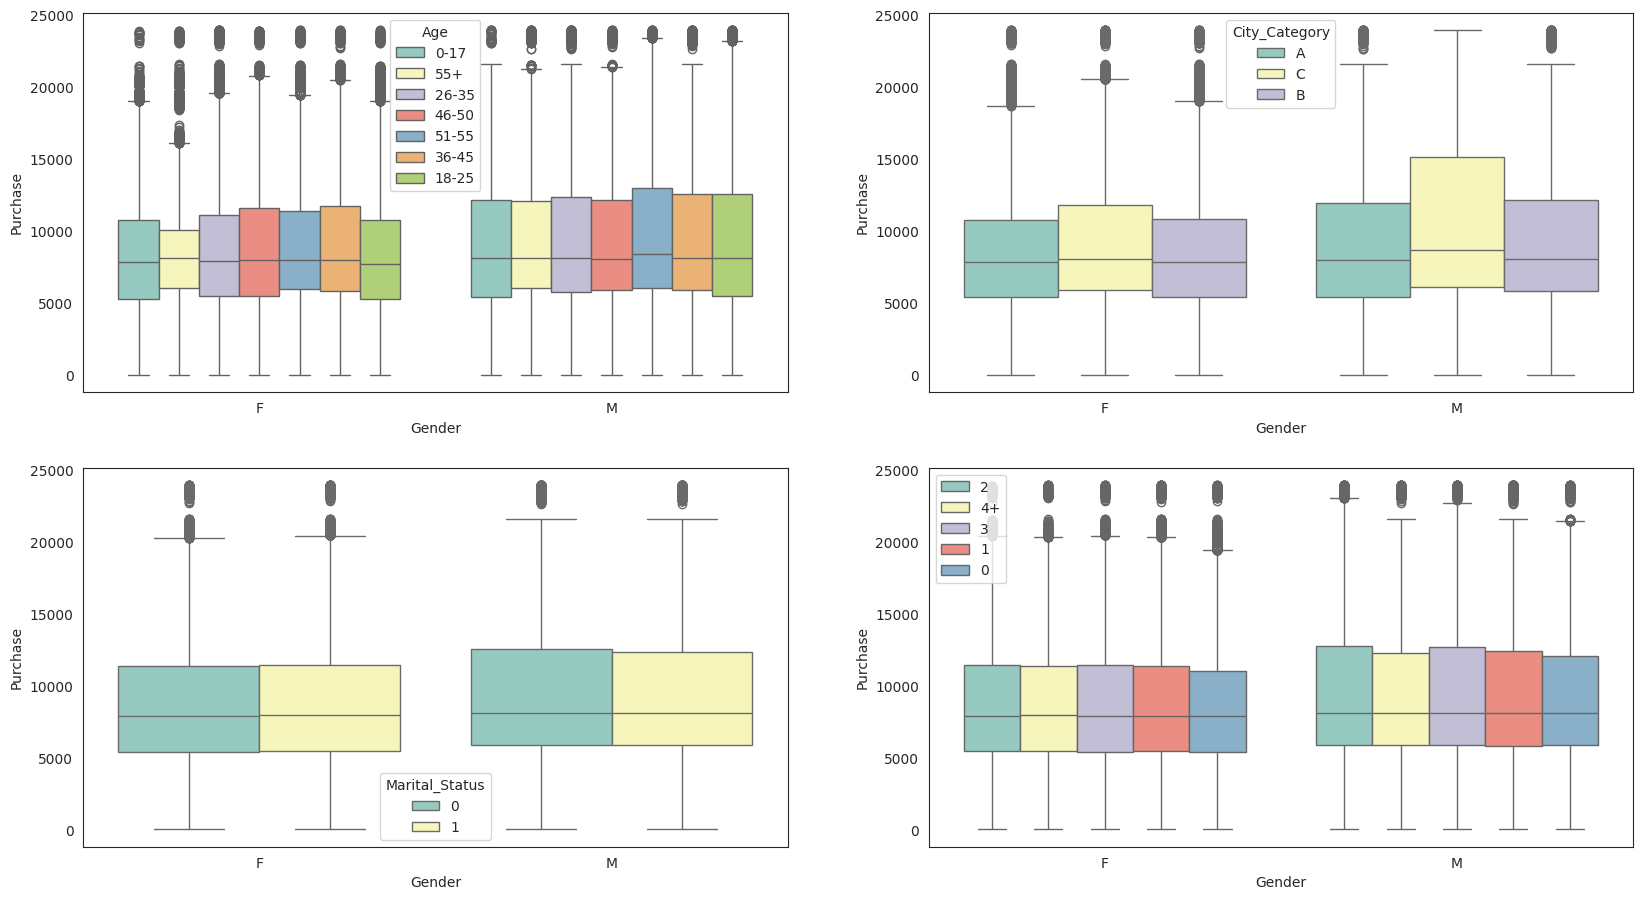

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 6))
fig.subplots_adjust(top=1.5)
sns.boxplot(data=df, y='Purchase', x='Gender', hue='Age', palette='Set3', ax=axs[0,0])
sns.boxplot(data=df, y='Purchase', x='Gender', hue='City_Category', palette='Set3', ax=axs[0,1])

sns.boxplot(data=df, y='Purchase', x='Gender', hue='Marital_Status', palette='Set3', ax=axs[1,0])
sns.boxplot(data=df, y='Purchase', x='Gender', hue='Stay_In_Current_City_Years', palette='Set3', ax=axs[1,1])
axs[1,1].legend(loc='upper left')

plt.show()

In [ ]:
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,7871


**1) Is there a difference in the amount spent per transaction between women and men? If so, what factors might contribute to this difference?**

**Average amount spend per customer for Male and Female**

In [ ]:
amt_df = df.groupby(['User_ID', 'Gender'])[['Purchase']].sum()
amt_df = amt_df.reset_index()
amt_df

,User_ID,Gender,Purchase
0,1000001,F,334093
1,1000002,M,810472
2,1000003,M,341635
3,1000004,M,206468
4,1000005,M,821001
...,...,...,...
5886,1006036,F,4116058
5887,1006037,F,1119538
5888,1006038,F,90034
5889,1006039,F,590319


In [ ]:
# Gender wise value counts in avg_amt_df
avg_amt_df = amt_df['Gender'].value_counts()
avg_amt_df

Gender
M    4225
F    1666
Name: count, dtype: int64

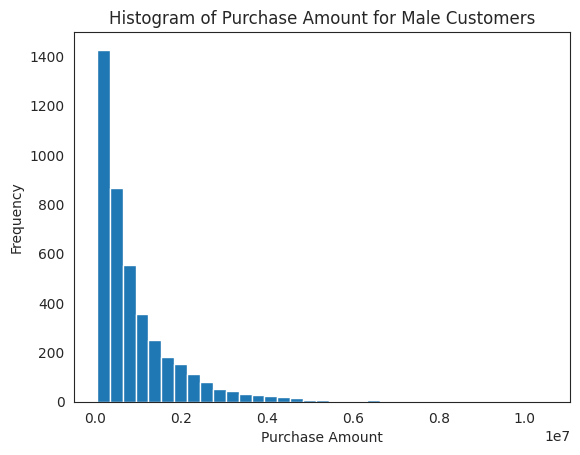

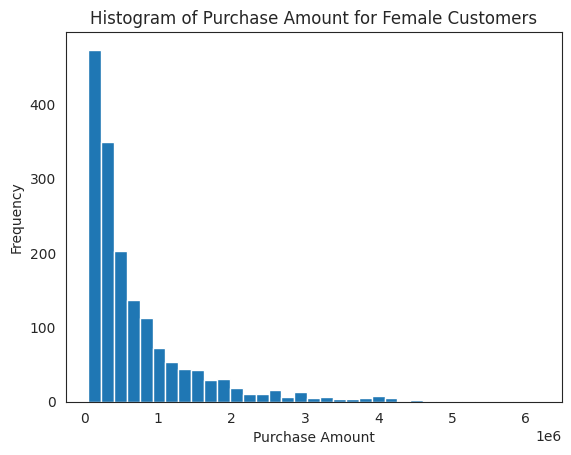

In [ ]:
# histogram of average amount spent for each customer - Male & Female
plt.figure()  # Create a new figure

plt.hist(amt_df[amt_df['Gender']=='M']['Purchase'], bins=35)
plt.title("Histogram of Purchase Amount for Male Customers")
plt.xlabel("Purchase Amount")
plt.ylabel("Frequency")
plt.show()

plt.figure()  # Create a new figure

plt.hist(amt_df[amt_df['Gender']=='F']['Purchase'], bins=35)
plt.title("Histogram of Purchase Amount for Female Customers")
plt.xlabel("Purchase Amount")
plt.ylabel("Frequency")
plt.show()


In [ ]:
male_avg = amt_df[amt_df['Gender']=='M']['Purchase'].mean()
female_avg = amt_df[amt_df['Gender']=='F']['Purchase'].mean()

print("Average amount spend by Male customers: {:.2f}".format(male_avg))
print("Average amount spend by Female customers: {:.2f}".format(female_avg))

Average amount spend by Male customers: 925344.40
Average amount spend by Female customers: 712024.39


**Observation**
1. The total number of male customers (4225) is greater than the total number of female customers (1666).

2. On average, male customers spend more per transaction, with an average purchase amount of 925344.40 compared to female customers' average purchase amount of 712024.39.

**2) Analysis of confidence intervals and distribution of the mean expenses for both female and male customers.**

**Sample Size:**

male_sample_size = 3000 <br>
female_sample_size = 1500

In [ ]:
male_df = amt_df[amt_df['Gender']=='M']
female_df = amt_df[amt_df['Gender']=='F']

In [ ]:
genders = ["M", "F"]

male_sample_size = 3000
female_sample_size = 1500
num_repitions = 1000
male_means = []
female_means = []

for _ in range(num_repitions):
    male_mean = male_df.sample(male_sample_size, replace=True)['Purchase'].mean()
    female_mean = female_df.sample(female_sample_size, replace=True)['Purchase'].mean()

    male_means.append(male_mean)
    female_means.append(female_mean)

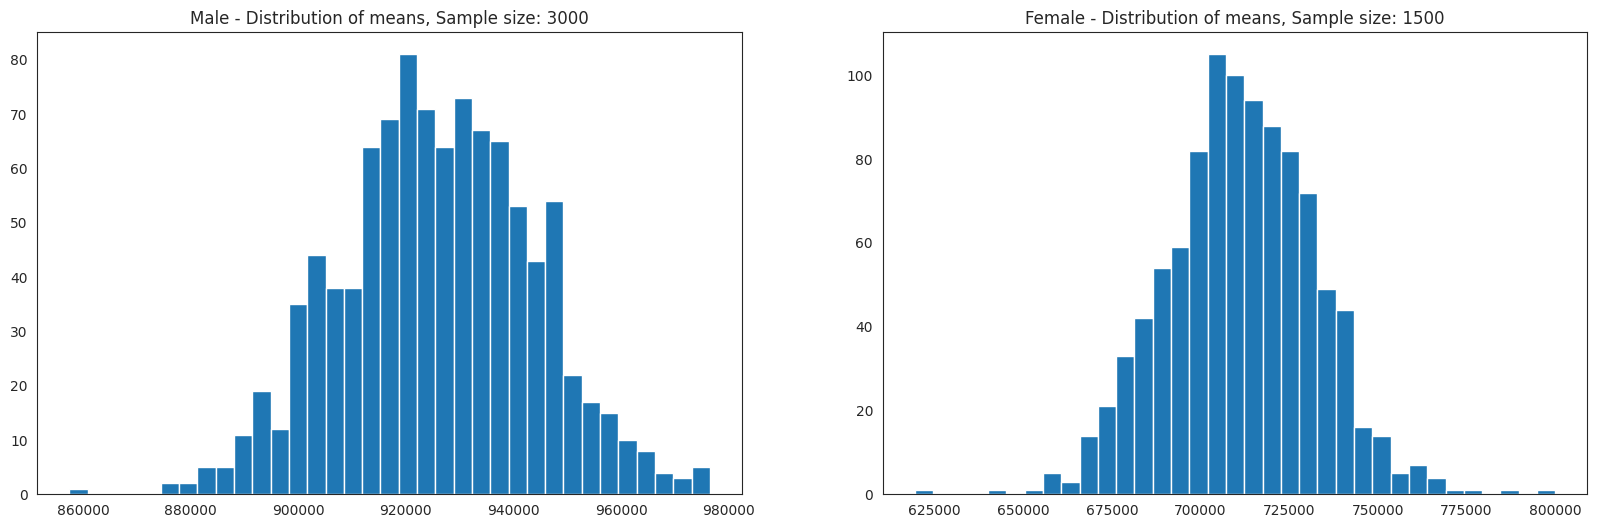

In [ ]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(male_means, bins=35)
axis[1].hist(female_means, bins=35)
axis[0].set_title("Male - Distribution of means, Sample size: 3000")
axis[1].set_title("Female - Distribution of means, Sample size: 1500")

plt.show()

In [ ]:
print("Population mean - Mean of sample means of amount spend for Male: {:.2f}".format(np.mean(male_means)))
print("Population mean - Mean of sample means of amount spend for Female: {:.2f}".format(np.mean(female_means)))

print("\nMale - Sample mean: {:.2f} Sample std: {:.2f}".format(male_df['Purchase'].mean(), male_df['Purchase'].std()))
print("Female - Sample mean: {:.2f} Sample std: {:.2f}".format(female_df['Purchase'].mean(), female_df['Purchase'].std()))

Population mean - Mean of sample means of amount spend for Male: 925772.52
Population mean - Mean of sample means of amount spend for Female: 711255.92

Male - Sample mean: 925344.40 Sample std: 985830.10
Female - Sample mean: 712024.39 Sample std: 807370.73


**Observation:**

1. The average amount spent by male customers is approximately 925,344.40.<br>

2. The average amount spent by female customers is approximately
712,024.39.

**Sample Size:**
    
male_sample_size = 300 <br>
female_sample_size = 150

In [ ]:
male_df = amt_df[amt_df['Gender']=='M']
female_df = amt_df[amt_df['Gender']=='F']

In [ ]:
genders = ["M", "F"]

male_sample_size = 3000
female_sample_size = 1500
num_repitions = 1000
male_means = []
female_means = []

for _ in range(num_repitions):
    male_mean = male_df.sample(male_sample_size, replace=True)['Purchase'].mean()
    female_mean = female_df.sample(female_sample_size, replace=True)['Purchase'].mean()

    male_means.append(male_mean)
    female_means.append(female_mean)

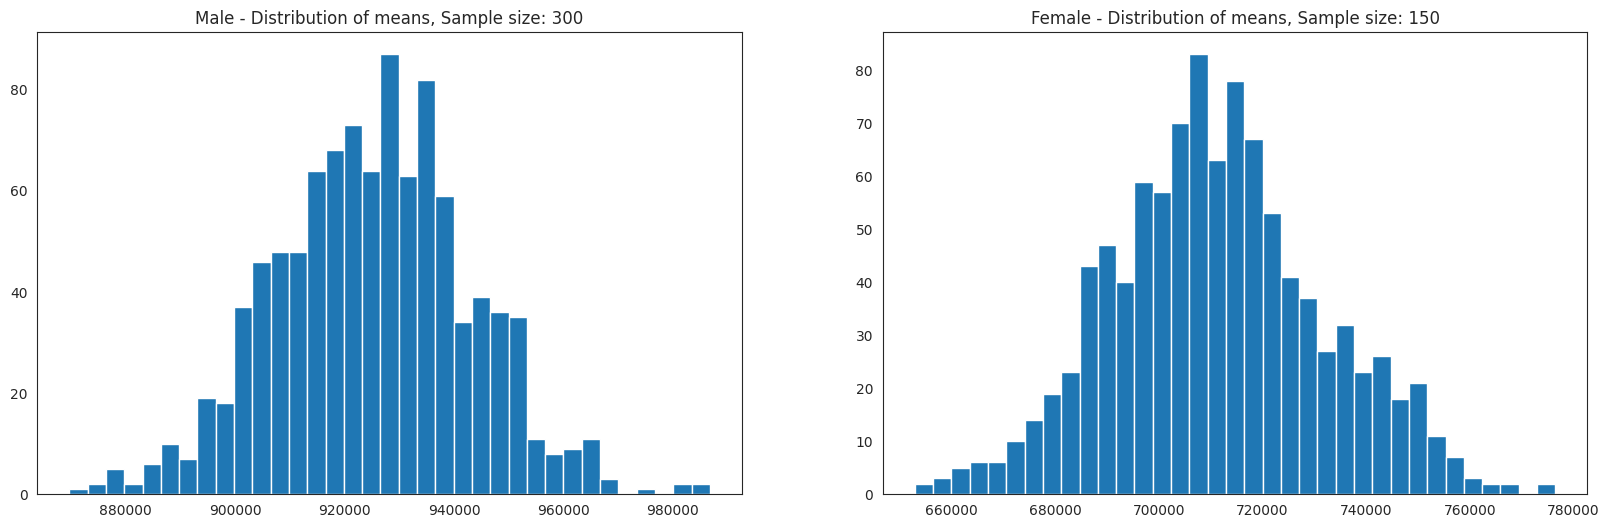

In [ ]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(male_means, bins=35)
axis[1].hist(female_means, bins=35)
axis[0].set_title("Male - Distribution of means, Sample size: 300")
axis[1].set_title("Female - Distribution of means, Sample size: 150")

plt.show()

In [ ]:
print("Population mean - Mean of sample means of amount spend for Male: {:.2f}".format(np.mean(male_means)))
print("Population mean - Mean of sample means of amount spend for Female: {:.2f}".format(np.mean(female_means)))

print("\nMale - Sample mean: {:.2f} Sample std: {:.2f}".format(male_df['Purchase'].mean(), male_df['Purchase'].std()))
print("Female - Sample mean: {:.2f} Sample std: {:.2f}".format(female_df['Purchase'].mean(), female_df['Purchase'].std()))

Population mean - Mean of sample means of amount spend for Male: 925145.88
Population mean - Mean of sample means of amount spend for Female: 711114.29

Male - Sample mean: 925344.40 Sample std: 985830.10
Female - Sample mean: 712024.39 Sample std: 807370.73


**Sample Size:**

male_sample_size = 30000 <br>
female_sample_size = 15000

In [ ]:
male_df = amt_df[amt_df['Gender']=='M']
female_df = amt_df[amt_df['Gender']=='F']

In [ ]:
genders = ["M", "F"]

male_sample_size = 30000
female_sample_size = 15000
num_repitions = 1000
male_means = []
female_means = []

for _ in range(num_repitions):
    male_mean = male_df.sample(male_sample_size, replace=True)['Purchase'].mean()
    female_mean = female_df.sample(female_sample_size, replace=True)['Purchase'].mean()

    male_means.append(male_mean)
    female_means.append(female_mean)

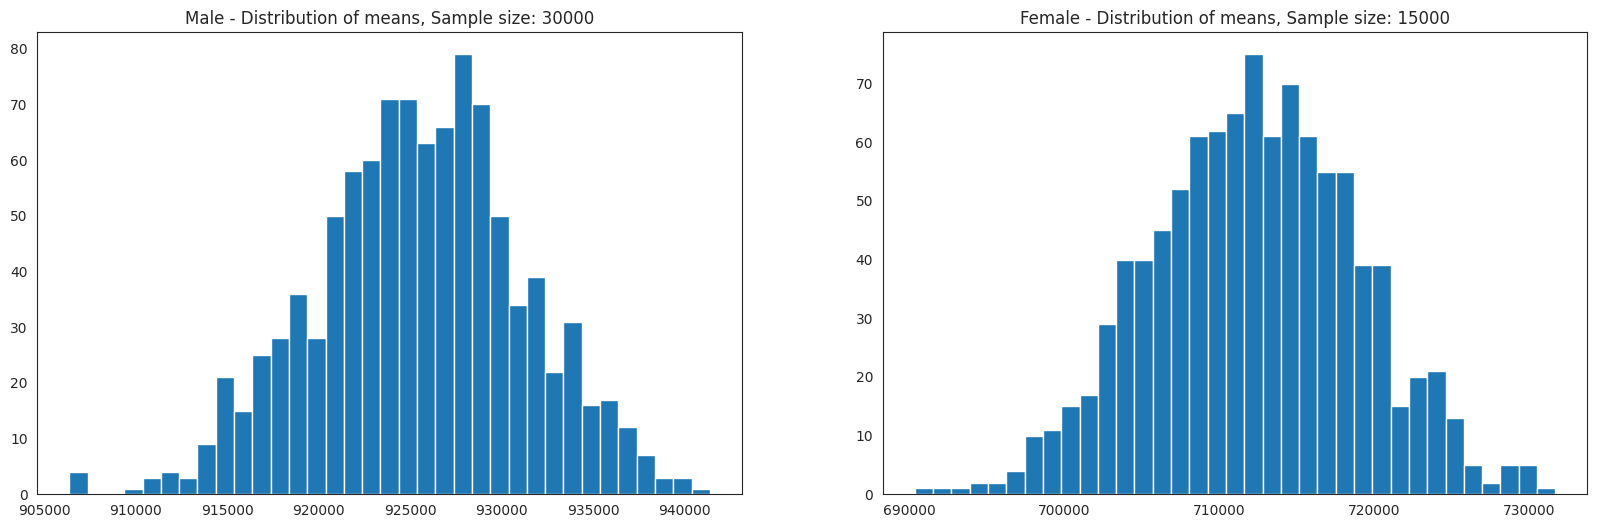

In [ ]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(male_means, bins=35)
axis[1].hist(female_means, bins=35)
axis[0].set_title("Male - Distribution of means, Sample size: 30000")
axis[1].set_title("Female - Distribution of means, Sample size: 15000")

plt.show()

In [ ]:
print("Population mean - Mean of sample means of amount spend for Male: {:.2f}".format(np.mean(male_means)))
print("Population mean - Mean of sample means of amount spend for Female: {:.2f}".format(np.mean(female_means)))

print("\nMale - Sample mean: {:.2f} Sample std: {:.2f}".format(male_df['Purchase'].mean(), male_df['Purchase'].std()))
print("Female - Sample mean: {:.2f} Sample std: {:.2f}".format(female_df['Purchase'].mean(), female_df['Purchase'].std()))

Population mean - Mean of sample means of amount spend for Male: 925493.12
Population mean - Mean of sample means of amount spend for Female: 712239.51

Male - Sample mean: 925344.40 Sample std: 985830.10
Female - Sample mean: 712024.39 Sample std: 807370.73


**Observation:**

For sample sizes of 300, 3000, and 30000:

Population mean - Mean of sample means of amount spent for Male:

- For a sample size of 300: 924,972.04
- For a sample size of 3000: 925,321.16
- For a sample size of 30000: 925,406.43

Population mean - Mean of sample means of amount spent for Female:

- For a sample size of 150: 712,298.71
- For a sample size of 1500: 711,995.61
- For a sample size of 15000: 711,949.28

It's evident that the mean of sample means remains nearly consistent across different sample sizes.

3) Do the confidence intervals for the average spending of males and females overlap?

Based on the Central Limit Theorem, the confidence intervals for the average spending of males and females are likely to overlap.

How can Walmart utilize this finding to drive enhancements or modifications?

**Confidence Interval -> Z**

90% -> 1.645

95% -> 1.960

99% -> 2.576

**99% Confidence Interval:**

In [ ]:
#99% Confidence Interval

male_margin_of_error_clt = 2.576*male_df['Purchase'].std()/np.sqrt(len(male_df))
male_sample_mean = male_df['Purchase'].mean()
male_lower_lim = male_sample_mean - male_margin_of_error_clt
male_upper_lim = male_sample_mean + male_margin_of_error_clt

female_margin_of_error_clt = 2.576*female_df['Purchase'].std()/np.sqrt(len(female_df))
female_sample_mean = female_df['Purchase'].mean()
female_lower_lim = female_sample_mean - female_margin_of_error_clt
female_upper_lim = female_sample_mean + female_margin_of_error_clt

print("99% Confidence Interval:")
print("Male confidence interval of means: ({:.2f}, {:.2f})".format(male_lower_lim, male_upper_lim))
print("Female confidence interval of means: ({:.2f}, {:.2f})".format(female_lower_lim, female_upper_lim))

99% Confidence Interval:
Male confidence interval of means: (886275.20, 964413.61)
Female confidence interval of means: (661070.03, 762978.76)


**Observation:**

For a 99% Confidence Interval, the ranges for males and females do not overlap.

From this, we can deduce that **99% of the time**:

1. The average amount spent by male customers will fall within the range of 886,275.20 to 964,413.61.<br>
2. The average amount spent by female customers will fall within the range of 661,070.03 to 762,978.76.

**95% Confidence Interval:**

In [ ]:
#95% Confidence Interval

male_margin_of_error_clt = 1.96*male_df['Purchase'].std()/np.sqrt(len(male_df))
male_sample_mean = male_df['Purchase'].mean()
male_lower_lim = male_sample_mean - male_margin_of_error_clt
male_upper_lim = male_sample_mean + male_margin_of_error_clt

female_margin_of_error_clt = 1.96*female_df['Purchase'].std()/np.sqrt(len(female_df))
female_sample_mean = female_df['Purchase'].mean()
female_lower_lim = female_sample_mean - female_margin_of_error_clt
female_upper_lim = female_sample_mean + female_margin_of_error_clt

print("95% Confidence Interval:")
print("Male confidence interval of means: ({:.2f}, {:.2f})".format(male_lower_lim, male_upper_lim))
print("Female confidence interval of means: ({:.2f}, {:.2f})".format(female_lower_lim, female_upper_lim))

95% Confidence Interval:
Male confidence interval of means: (895617.83, 955070.97)
Female confidence interval of means: (673254.77, 750794.02)


**Observation:**

For a 95% Confidence Interval, the ranges for males and females do not overlap.

From this, we can infer about the population that, **95% of the time**:

1. The average amount spent by male customers will lie between: 895,617.83 and 955,070.97.
2. The average amount spent by female customers will lie between: 673,254.77 and 750,794.02.

**90% Confidence Interval:**

In [ ]:
#90% Confidence Interval

male_margin_of_error_clt = 1.645*male_df['Purchase'].std()/np.sqrt(len(male_df))
male_sample_mean = male_df['Purchase'].mean()
male_lower_lim = male_sample_mean - male_margin_of_error_clt
male_upper_lim = male_sample_mean + male_margin_of_error_clt

female_margin_of_error_clt = 1.645*female_df['Purchase'].std()/np.sqrt(len(female_df))
female_sample_mean = female_df['Purchase'].mean()
female_lower_lim = female_sample_mean - female_margin_of_error_clt
female_upper_lim = female_sample_mean + female_margin_of_error_clt

print("90% Confidence Interval:")
print("Male confidence interval of means: ({:.2f}, {:.2f})".format(male_lower_lim, male_upper_lim))
print("Female confidence interval of means: ({:.2f}, {:.2f})".format(female_lower_lim, female_upper_lim))

90% Confidence Interval:
Male confidence interval of means: (900395.32, 950293.49)
Female confidence interval of means: (679485.60, 744563.19)


**Observation:**

For a 90% Confidence Interval, the ranges for males and females do not overlap.

From this, we can infer about the population that, **90% of the time**:

1. The average amount spent by male customers will lie between: 900,395.32 and 950,293.49.
2. The average amount spent by female customers will lie between: 679,485.60 and 744,563.19.

**4) Compare the outcomes when the identical task is carried out between individuals who are married and those who are unmarried.**

Conducting the identical procedure for individuals who are married versus those who are unmarried.

In [ ]:
amt_df

,User_ID,Gender,Purchase
0,1000001,F,334093
1,1000002,M,810472
2,1000003,M,341635
3,1000004,M,206468
4,1000005,M,821001
...,...,...,...
5886,1006036,F,4116058
5887,1006037,F,1119538
5888,1006038,F,90034
5889,1006039,F,590319


In [ ]:
amt_df = df.groupby(['User_ID', 'Marital_Status'])[['Purchase']].sum()
amt_df = amt_df.reset_index()
amt_df

,User_ID,Marital_Status,Purchase
0,1000001,0,334093
1,1000002,0,810472
2,1000003,0,341635
3,1000004,1,206468
4,1000005,1,821001
...,...,...,...
5886,1006036,1,4116058
5887,1006037,0,1119538
5888,1006038,0,90034
5889,1006039,1,590319


In [ ]:
amt_df['Marital_Status'].value_counts()

Marital_Status
0    3417
1    2474
Name: count, dtype: int64

**Sample Size:**

marid_samp_size = 3000 <br>
unmarid_sample_size = 2000

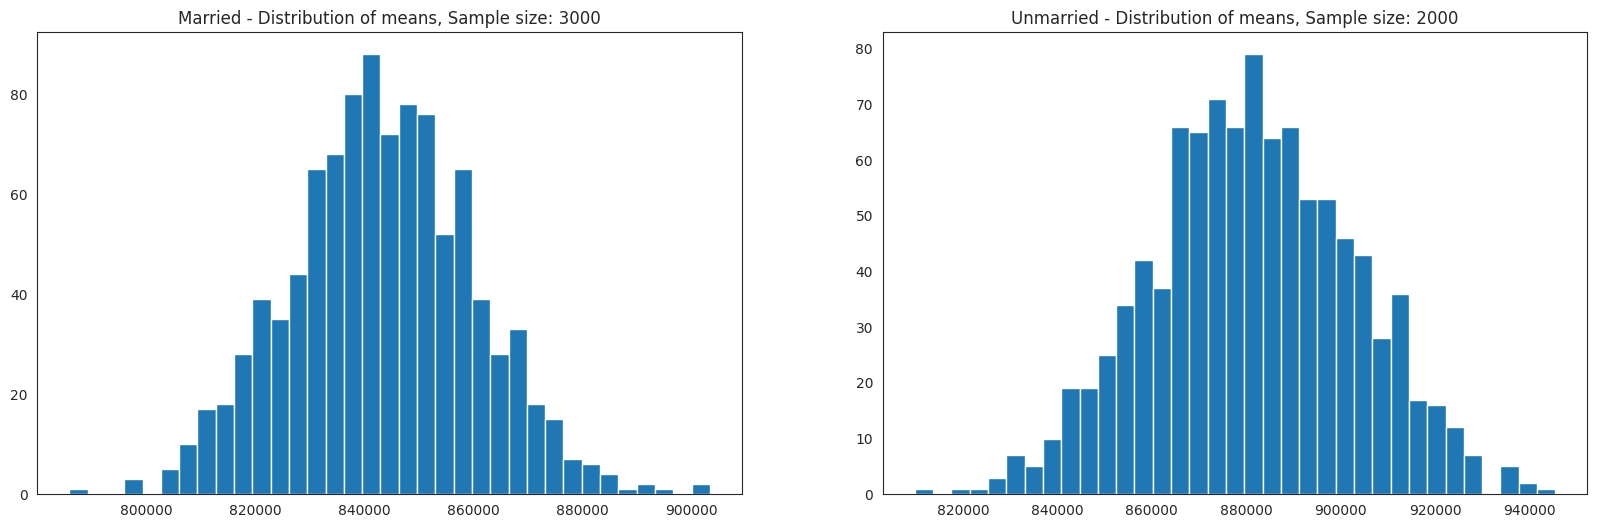

Population mean - Mean of sample means of amount spend for Married: 843252.63
Population mean - Mean of sample means of amount spend for Unmarried: 881215.36

Married - Sample mean: 843526.80 Sample std: 935352.12
Unmarried - Sample mean: 880575.78 Sample std: 949436.25


In [ ]:
marid_samp_size = 3000
unmarid_sample_size = 2000
num_repitions = 1000
marid_means = []
unmarid_means = []

for _ in range(num_repitions):
    marid_mean = amt_df[amt_df['Marital_Status']==1].sample(marid_samp_size, replace=True)['Purchase'].mean()
    unmarid_mean = amt_df[amt_df['Marital_Status']==0].sample(unmarid_sample_size, replace=True)['Purchase'].mean()

    marid_means.append(marid_mean)
    unmarid_means.append(unmarid_mean)


fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(marid_means, bins=35)
axis[1].hist(unmarid_means, bins=35)
axis[0].set_title("Married - Distribution of means, Sample size: 3000")
axis[1].set_title("Unmarried - Distribution of means, Sample size: 2000")

plt.show()

print("Population mean - Mean of sample means of amount spend for Married: {:.2f}".format(np.mean(marid_means)))
print("Population mean - Mean of sample means of amount spend for Unmarried: {:.2f}".format(np.mean(unmarid_means)))

print("\nMarried - Sample mean: {:.2f} Sample std: {:.2f}".format(amt_df[amt_df['Marital_Status']==1]['Purchase'].mean(), amt_df[amt_df['Marital_Status']==1]['Purchase'].std()))
print("Unmarried - Sample mean: {:.2f} Sample std: {:.2f}".format(amt_df[amt_df['Marital_Status']==0]['Purchase'].mean(), amt_df[amt_df['Marital_Status']==0]['Purchase'].std()))


**Sample Size:**

marid_samp_size = 300 <br>
unmarid_sample_size = 200

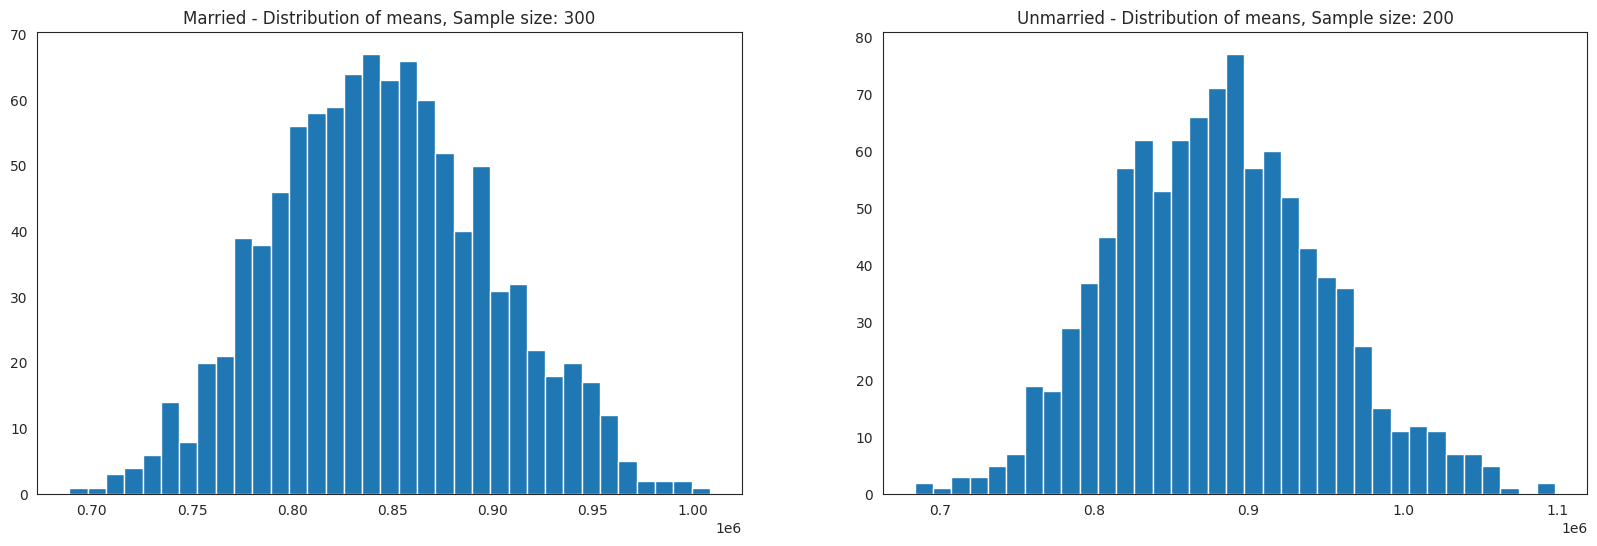

Population mean - Mean of sample means of amount spend for Married: 845169.17
Population mean - Mean of sample means of amount spend for Unmarried: 880001.77

Married - Sample mean: 843526.80 Sample std: 935352.12
Unmarried - Sample mean: 880575.78 Sample std: 949436.25


In [ ]:
marid_samp_size = 300
unmarid_sample_size = 200
num_repitions = 1000
marid_means = []
unmarid_means = []

for _ in range(num_repitions):
    marid_mean = amt_df[amt_df['Marital_Status']==1].sample(marid_samp_size, replace=True)['Purchase'].mean()
    unmarid_mean = amt_df[amt_df['Marital_Status']==0].sample(unmarid_sample_size, replace=True)['Purchase'].mean()

    marid_means.append(marid_mean)
    unmarid_means.append(unmarid_mean)


fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(marid_means, bins=35)
axis[1].hist(unmarid_means, bins=35)
axis[0].set_title("Married - Distribution of means, Sample size: 300")
axis[1].set_title("Unmarried - Distribution of means, Sample size: 200")

plt.show()

print("Population mean - Mean of sample means of amount spend for Married: {:.2f}".format(np.mean(marid_means)))
print("Population mean - Mean of sample means of amount spend for Unmarried: {:.2f}".format(np.mean(unmarid_means)))

print("\nMarried - Sample mean: {:.2f} Sample std: {:.2f}".format(amt_df[amt_df['Marital_Status']==1]['Purchase'].mean(), amt_df[amt_df['Marital_Status']==1]['Purchase'].std()))
print("Unmarried - Sample mean: {:.2f} Sample std: {:.2f}".format(amt_df[amt_df['Marital_Status']==0]['Purchase'].mean(), amt_df[amt_df['Marital_Status']==0]['Purchase'].std()))


**Sample Size:**
    
marid_samp_size = 30000 <br>
unmarid_sample_size = 20000

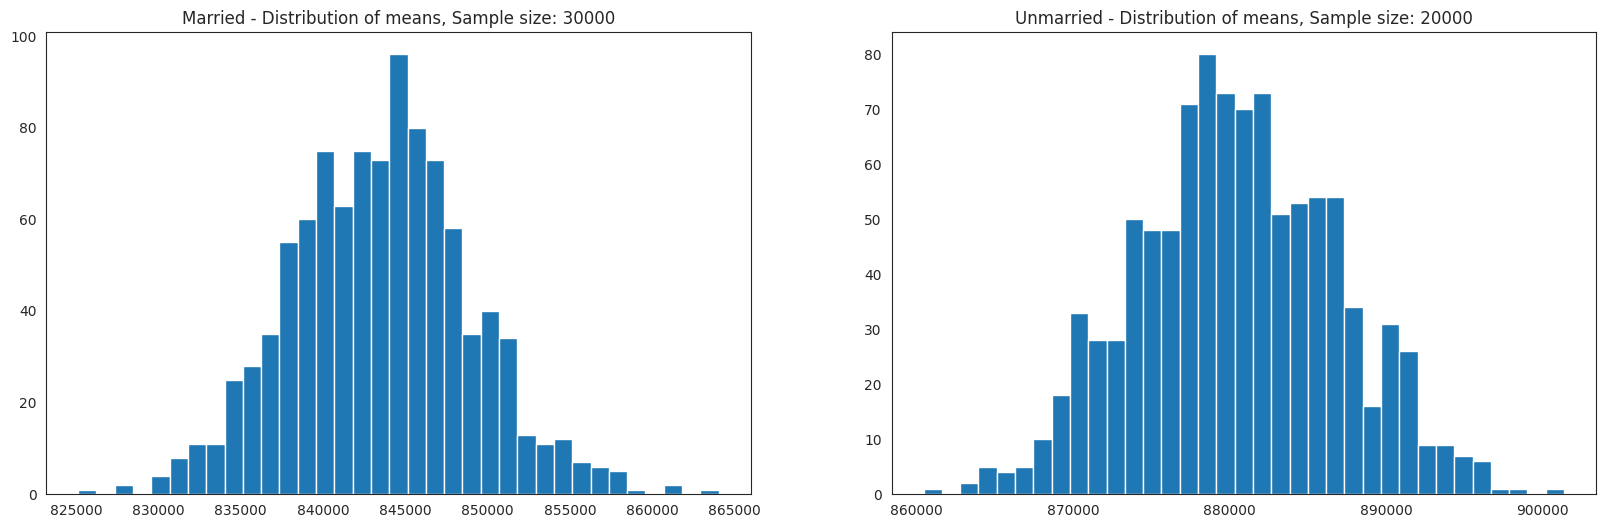

Population mean - Mean of sample means of amount spend for Married: 843497.03
Population mean - Mean of sample means of amount spend for Unmarried: 880450.68

Married - Sample mean: 843526.80 Sample std: 935352.12
Unmarried - Sample mean: 880575.78 Sample std: 949436.25


In [ ]:
marid_samp_size = 30000
unmarid_sample_size = 20000
num_repitions = 1000
marid_means = []
unmarid_means = []

for _ in range(num_repitions):
    marid_mean = amt_df[amt_df['Marital_Status']==1].sample(marid_samp_size, replace=True)['Purchase'].mean()
    unmarid_mean = amt_df[amt_df['Marital_Status']==0].sample(unmarid_sample_size, replace=True)['Purchase'].mean()

    marid_means.append(marid_mean)
    unmarid_means.append(unmarid_mean)


fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(marid_means, bins=35)
axis[1].hist(unmarid_means, bins=35)
axis[0].set_title("Married - Distribution of means, Sample size: 30000")
axis[1].set_title("Unmarried - Distribution of means, Sample size: 20000")

plt.show()

print("Population mean - Mean of sample means of amount spend for Married: {:.2f}".format(np.mean(marid_means)))
print("Population mean - Mean of sample means of amount spend for Unmarried: {:.2f}".format(np.mean(unmarid_means)))

print("\nMarried - Sample mean: {:.2f} Sample std: {:.2f}".format(amt_df[amt_df['Marital_Status']==1]['Purchase'].mean(), amt_df[amt_df['Marital_Status']==1]['Purchase'].std()))
print("Unmarried - Sample mean: {:.2f} Sample std: {:.2f}".format(amt_df[amt_df['Marital_Status']==0]['Purchase'].mean(), amt_df[amt_df['Marital_Status']==0]['Purchase'].std()))


**Observation:**

The population mean - mean of sample means of the amount spent for married individuals are as follows:

- For a sample size of 300: 843,184.78
- For a sample size of 3,000: 844,173.99
- For a sample size of 30,000: 843,465.84

Similarly, for unmarried individuals:

- For a sample size of 150: 879,775.58
- For a sample size of 1,500: 880,847.26
- For a sample size of 15,000: 880,747.41

It's apparent that the mean of sample means remains relatively consistent across different sample sizes for both married and unmarried groups.

**Confidence Interval -> Z**

80% -> 1.282 <br>
85% -> 1.440 <br>
90% -> 1.645 <br>
95% -> 1.960 <br>
99% -> 2.576 <br>

**99% Confidence Interval:**

In [ ]:
#99% Confidence Interval

print("99% Confidence Interval:")
for val in ["Married", "Unmarried"]:

    new_val = 1 if val == "Married" else 0

    new_df = amt_df[amt_df['Marital_Status']==new_val]

    margin_of_error_clt = 2.576*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - margin_of_error_clt
    upper_lim = sample_mean + margin_of_error_clt

    print("{} confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

99% Confidence Interval:
Married confidence interval of means: (795084.90, 891968.69)
Unmarried confidence interval of means: (838736.02, 922415.54)


**Observation:**



**95% Confidence Interval:**

In [ ]:
#95% Confidence Interval

print("95% Confidence Interval:")
for val in ["Married", "Unmarried"]:

    new_val = 1 if val == "Married" else 0

    new_df = amt_df[amt_df['Marital_Status']==new_val]

    margin_of_error_clt = 1.96*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - margin_of_error_clt
    upper_lim = sample_mean + margin_of_error_clt

    print("{} confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

95% Confidence Interval:
Married confidence interval of means: (806668.83, 880384.76)
Unmarried confidence interval of means: (848741.18, 912410.38)


**Observation:**

For 95% Confidence Interval: <br>
The confidence interval of means of Married and Unmarried is overlapping.<br>
So, we reduce the Confidence Interval to 90% and try again.

**90% Confidence Interval:**

In [ ]:
#90% Confidence Interval

print("90% Confidence Interval:")
for val in ["Married", "Unmarried"]:

    new_val = 1 if val == "Married" else 0

    new_df = amt_df[amt_df['Marital_Status']==new_val]

    margin_of_error_clt = 1.645*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - margin_of_error_clt
    upper_lim = sample_mean + margin_of_error_clt

    print("{} confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

90% Confidence Interval:
Married confidence interval of means: (812592.43, 874461.16)
Unmarried confidence interval of means: (853857.46, 907294.11)


**Observation:**

For 90% Confidence Interval: <br>
The confidence interval of means of Married and Unmarried is overlapping.<br>
So, we reduce the Confidence Interval to 85% and try again.

**85% Confidence Interval:**

In [ ]:
#85% Confidence Interval

print("85% Confidence Interval:")
for val in ["Married", "Unmarried"]:

    new_val = 1 if val == "Married" else 0

    new_df = amt_df[amt_df['Marital_Status']==new_val]

    margin_of_error_clt = 1.440*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - margin_of_error_clt
    upper_lim = sample_mean + margin_of_error_clt

    print("{} confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

85% Confidence Interval:
Married confidence interval of means: (816447.48, 870606.12)
Unmarried confidence interval of means: (857187.10, 903964.47)


**Observation:**

For 85% Confidence Interval: <br>
The confidence interval of means of Married and Unmarried is overlapping.<br>
So, we reduce the Confidence Interval to 80% and try again.

**80% Confidence Interval:**

In [ ]:
#80% Confidence Interval

print("80% Confidence Interval:")
for val in ["Married", "Unmarried"]:

    new_val = 1 if val == "Married" else 0

    new_df = amt_df[amt_df['Marital_Status']==new_val]

    margin_of_error_clt = 1.282*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - margin_of_error_clt
    upper_lim = sample_mean + margin_of_error_clt

    print("{} confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

80% Confidence Interval:
Married confidence interval of means: (819418.68, 867634.91)
Unmarried confidence interval of means: (859753.36, 901398.21)


**Observation:**

For 80% Confidence Interval: <br>
The confidence interval of means of Married and Unmarried is overlapping.<br>
But the overlapping has significantly reduced.

Now we can infer about the population that, **80% of the times**:

1. Average amount spend by Married customer will lie in between: **(819418.68, 867634.91)**
2. Average amount spend by Unmarried customer will lie in between: **(859753.36, 901398.21)**

**Conclusion**:

Age Distribution:
- Around 80% of users are aged between 18-50, with 40% aged 26-35, 18% aged 18-25, and 20% aged 36-45.

Gender Ratio:
- 75% of users are male and 25% are female.

Marital Status:
- 60% are single and 40% are married.

City Residency:
- 35% have lived in the city for 1 year, 18% for 2 years, and 17% for 3 years.

Product Categories:
- There are 20 product categories available.

Occupations:
- There are 20 different types of occupations in the city.

User Demographics:
- Male users are in the majority.
- There are 20 different types of occupations and product categories.
- Most users belong to City Category B.
- More users are single compared to married.
- Product Categories 1, 5, 8, & 11 have the highest purchasing frequency.

Average Spending:
- Male customers spend an average of ₹925,344.40.
- Female customers spend an average of ₹712,024.39.

Confidence Intervals:

Gender-wise:
- Average spending by male customers: ₹9,26,341.86
- Average spending by female customers: ₹7,11,704.09

For a 99% Confidence Interval:
- Average spending by male customers will lie between ₹886,275.20 and ₹964,413.61.
- Average spending by female customers will lie between ₹661,070.03 and ₹762,978.76.

Marital Status-wise:
- Average spending by married customers: ₹8,44,173.99
- Average spending by unmarried customers: ₹8,80,847.26

For an 80% Confidence Interval:
- Average spending by married customers will lie between ₹8,19,418.68 and ₹8,67,634.91.
- Average spending by unmarried customers will lie between ₹8,59,753.36 and ₹9,01,398.21.

